In [3]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

# 1. Splitting the Dataset

- Division into sets:
    - For modelers (70%) - X_modelling, y_modelling
    - For validators (30%) - X_validating, y_validating

- Splitting the modeler's dataset into:
    - Training set (70%) - X_train, y_train
    - Validation set (20%) - X_val, y_val
    - Test set (10%) - X_test, y_test

In [12]:
spotify_full_df = pd.read_csv('../Data/spotify-2023.csv', encoding='latin1')

mod_df, val_df = train_test_split(
    spotify_full_df, test_size=0.3, random_state=42
)

print(mod_df.shape)

print(val_df.shape)

(667, 24)
(286, 24)


Saving separate CSV files for modelers and validators

In [6]:
mod_df.to_csv('../Data/spotify_modelling.csv', index=False)
val_df.to_csv('../Data/spotify_validating.csv', index=False)


Splitting the dataset for modelers into training, validation, and test sets

In [7]:
X_train, X_val = train_test_split(
    mod_df, test_size=0.3, random_state=42
)
X_val, X_test = train_test_split(
    X_val, test_size=0.3, random_state=42
)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(466, 24)
(140, 24)
(61, 24)


# 2. Data Import

In [10]:
spotify_df = pd.read_csv('../Data/spotify_modelling.csv')
spotify_df.head(10) 

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,You Proof,Morgan Wallen,1,2022,5,13,2128,9,367814306,37,...,120,A,Major,73,64,85,25,0,61,3
1,Adore You,Harry Styles,1,2019,12,6,13454,1,1439191367,246,...,99,G#,Major,68,57,77,2,0,10,5
2,Piï¿½ï¿½man Deï¿,"Semicenk, Doï¿½ï¿½u",2,2023,6,2,185,3,43522589,5,...,98,A#,Minor,73,45,62,28,0,13,13
3,CORAZï¿½ï¿½N VA,Maria Becerra,1,2023,6,22,370,20,43857627,12,...,98,C#,Major,68,40,79,33,0,30,6
4,Those Eyes,New West,1,2019,5,10,1507,14,411747614,24,...,120,E,Major,60,24,35,73,0,31,3
5,Crown,Kendrick Lamar,1,2022,5,13,1493,0,42485571,2,...,170,C#,Minor,37,14,24,80,0,11,4
6,HUMBLE.,Kendrick Lamar,1,2017,3,30,33206,1,1929770265,284,...,150,C#,Minor,91,42,60,0,0,9,12
7,I Know - PR1SVX Edit,"Kanii, PR1ISVX",2,2023,3,24,407,0,77377503,16,...,134,B,Minor,67,11,76,8,47,30,7
8,Levitating (feat. DaBaby),"Dua Lipa, DaBaby",2,2020,3,27,15894,8,1802514301,198,...,103,F#,Minor,70,92,83,1,0,7,6
9,DOGTOOTH,"Tyler, The Creator",2,2023,3,27,1479,0,80758350,23,...,78,G#,Major,71,80,65,51,0,22,32


In [13]:
print(spotify_full_df.shape)

(953, 24)


### About dataset

Our dataset has 953 records and 24 columns.

**Columns descriptions**

- **track_name**: Name of the song
- **artist(s)_name**: Name of the artist(s) of the song
- **artist_count**: Number of artists contributing to the song
- **released_year**: Year when the song was released
- **released_month**: Month when the song was released
- **released_day**: Day of the month when the song was released
- **in_spotify_playlists**: Number of Spotify playlists the song is included in
- **in_spotify_charts**: Presence and rank of the song on Spotify charts
- **streams**: Total number of streams on Spotify
- **in_apple_playlists**: Number of Apple Music playlists the song is included in
- **in_apple_charts**: Presence and rank of the song on Apple Music charts
- **in_deezer_playlists**: Number of Deezer playlists the song is included in
- **in_deezer_charts**: Presence and rank of the song on Deezer charts
- **in_shazam_charts**: Presence and rank of the song on Shazam charts
- **bpm**: Beats per minute, a measure of song tempo
- **key**: Key of the song
- **mode**: Mode of the song (major or minor)
- **danceability_%**: Percentage indicating how suitable the song is for dancing
- **valence_%**: Positivity of the song's musical content
- **energy_%**: Perceived energy level of the song
- **acousticness_%**: Amount of acoustic sound in the song
- **instrumentalness_%**: Amount of instrumental content in the song
- **liveness_%**: Presence of live performance elements
- **speechiness_%**: Amount of spoken words in the song


# 3. Checking Basic Information about the Dataset

In [14]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            667 non-null    object
 1   artist(s)_name        667 non-null    object
 2   artist_count          667 non-null    int64 
 3   released_year         667 non-null    int64 
 4   released_month        667 non-null    int64 
 5   released_day          667 non-null    int64 
 6   in_spotify_playlists  667 non-null    int64 
 7   in_spotify_charts     667 non-null    int64 
 8   streams               667 non-null    object
 9   in_apple_playlists    667 non-null    int64 
 10  in_apple_charts       667 non-null    int64 
 11  in_deezer_playlists   667 non-null    object
 12  in_deezer_charts      667 non-null    int64 
 13  in_shazam_charts      632 non-null    object
 14  bpm                   667 non-null    int64 
 15  key                   598 non-null    ob

C:\Users\natal\AppData\Local\Temp\ipykernel_27460\3194581726.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dis_dist = sns.distplot(spotify_df[column], bins=20)
C:\Users\natal\AppData\Local\Temp\ipykernel_27460\3194581726.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dis_dist = sns.distplot(spotify_df[column

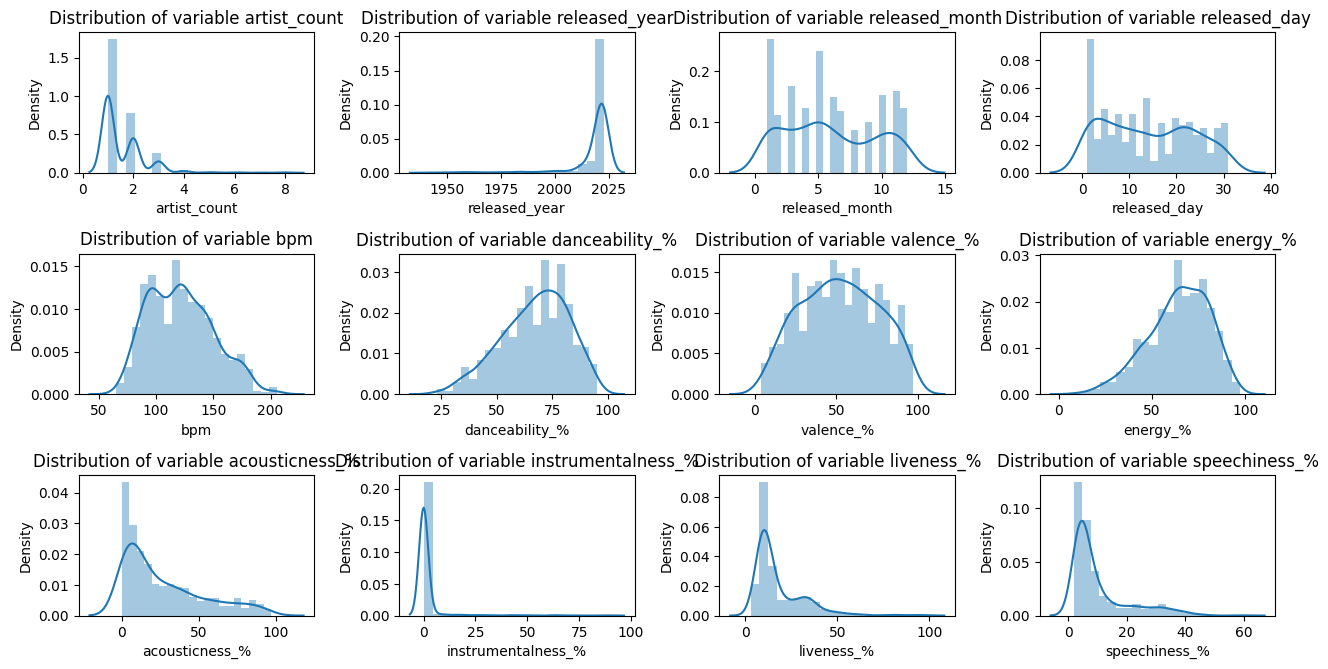

In [19]:
plt.figure(figsize=(13, 13))

columns = ['artist_count', 'released_year', 'released_month', 'released_day', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

r = 6  # Number of rows in the subplot grid
c = 4  # Number of columns in the subplot grid

for i, column in enumerate(columns):
    plt.subplot(r, c, i+1)
    dis_dist = sns.distplot(spotify_df[column], bins=20)
    dis_dist.set_title(f'Distribution of variable {column}')  

plt.tight_layout() 
plt.show()

In [20]:
spotify_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,1.557721,2018.091454,5.992504,14.071964,5415.815592,12.259370,67.614693,50.760120,2.617691,121.865067,67.061469,52.097451,64.295352,26.643178,1.467766,17.916042,10.157421
std,0.890834,11.212620,3.573544,9.382796,8196.740713,20.156227,84.156261,49.902241,6.154848,27.979719,14.924660,23.506969,16.296834,25.882359,8.087366,13.518161,9.781430
min,1.000000,1942.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,888.500000,0.000000,13.000000,6.000000,0.000000,98.000000,57.000000,33.000000,54.000000,6.000000,0.000000,9.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2291.000000,3.000000,34.000000,36.000000,0.000000,120.000000,69.000000,52.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,6031.000000,16.000000,85.500000,84.000000,2.000000,140.000000,78.000000,71.000000,77.000000,41.000000,0.000000,23.000000,11.500000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,537.000000,263.000000,58.000000,206.000000,95.000000,97.000000,97.000000,97.000000,90.000000,97.000000,59.000000


# 4. Analysis of values and dependencies in the dataset

In [22]:
spotify_short_df = spotify_df.loc[:, ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

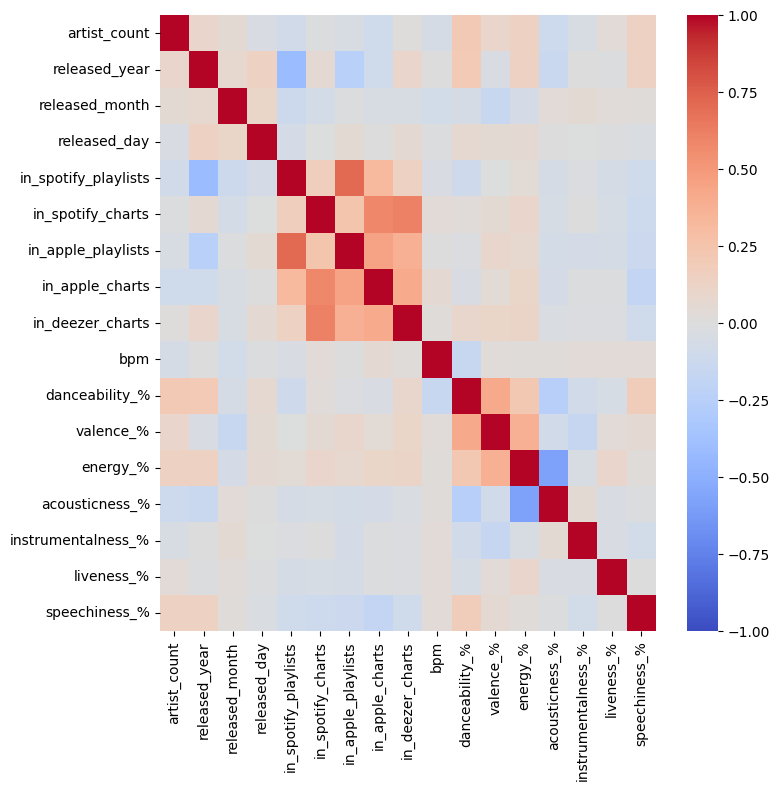

In [24]:
correlation_matrix = spotify_short_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=False, vmin=-1, vmax=1, cmap='coolwarm', fmt=".2f")
plt.show()